In [5]:
import geopandas as gpd
import pandas as pd

In [6]:
data = gpd.read_file("data/Humber.network.gpkg")

<AxesSubplot:>

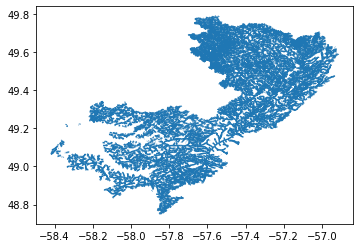

In [8]:
data.plot()

<AxesSubplot:>

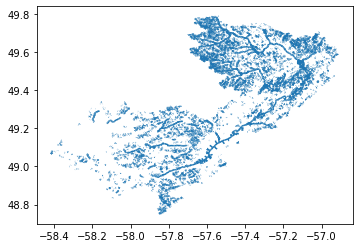

In [4]:
data[data['type']=="Inferred"].plot()

<AxesSubplot:>

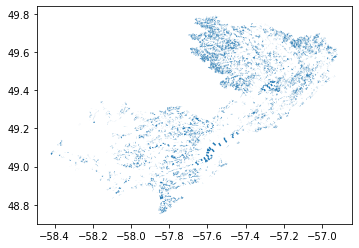

In [5]:
data[data['type']=="Bank"].plot()

<AxesSubplot:>

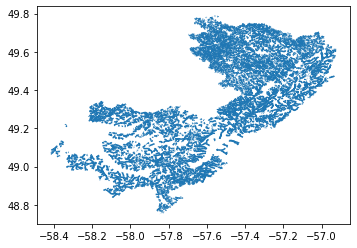

In [6]:
data[data['type']=="Observed"].plot()

In [7]:
data['type'].unique()

array(['Inferred', 'Bank', 'Observed'], dtype=object)

In [8]:
data['region_id'].unique()

array(['Humber'], dtype=object)

In [9]:
print(data[['geometry']].iloc[0,0])

LINESTRING (-57.96237429999996 49.25319080000003, -57.96232633667583 49.25334320959315, -57.96232766883003 49.2533500737111, -57.96243002545302 49.25347070590647, -57.96245387781188 49.25350243164743, -57.96246950809248 49.25352822421453, -57.962483202097 49.25355572957685, -57.9625121440422 49.25363205765985)


In [10]:
data['rank'].unique()

array(['Primary', 'Secondary'], dtype=object)

In [11]:
data['type'].unique()

array(['Inferred', 'Bank', 'Observed'], dtype=object)

In [12]:
data

,region_id,type,rank,length,name,nameid,from_node_id,to_node_id,geometry
0,Humber,Inferred,Primary,52.404344,None,None,26762,26764,"LINESTRING (-57.96237 49.25319, -57.96233 49.2..."
1,Humber,Inferred,Primary,38.001086,None,None,8150,8147,"LINESTRING (-57.08230 49.42386, -57.08234 49.4..."
2,Humber,Inferred,Primary,41.694741,None,None,8151,8150,"LINESTRING (-57.08232 49.42422, -57.08235 49.4..."
3,Humber,Bank,Primary,21.196205,None,None,8148,8150,"LINESTRING (-57.08210 49.42372, -57.08220 49.4..."
4,Humber,Inferred,Primary,14.079574,None,None,51032,51029,"LINESTRING (-57.50818 49.73562, -57.50818 49.7..."
...,...,...,...,...,...,...,...,...,...
56379,Humber,Inferred,Primary,12.493163,None,None,47410,47409,"LINESTRING (-57.59447 49.61635, -57.59431 49.6..."
56380,Humber,Inferred,Primary,6.965072,None,None,47409,47407,"LINESTRING (-57.59431 49.61630, -57.59423 49.6..."
56381,Humber,Inferred,Primary,9.363050,None,None,13134,13141,"LINESTRING (-57.35209 49.28417, -57.35206 49.2..."
56382,Humber,Bank,Primary,13.469889,None,None,13131,13132,"LINESTRING (-57.35186 49.28394, -57.35195 49.2..."


In [13]:
len(data['from_node_id'].unique())

55386

In [14]:
len(data.geometry[0].coords)

8

In [21]:
data['from_lat'] = data.apply(lambda x: x.geometry.coords[0][1], axis = 1)
data['from_lon'] = data.apply(lambda x: x.geometry.coords[0][0], axis = 1)
data['to_lat'] = data.apply(lambda x: x.geometry.coords[-1][1], axis = 1)
data['to_lon'] = data.apply(lambda x: x.geometry.coords[-1][0], axis = 1)
data['number_of_sections'] = data.apply(lambda x: len(x.geometry.coords), axis = 1)


In [61]:
data.head()

,region_id,type,rank,length,name,nameid,from_node_id,to_node_id,geometry,from_lat,from_lon,to_lat,to_lon,number_of_sections
0,Humber,Inferred,Primary,52.404344,None,None,26762,26764,"LINESTRING (-57.96237 49.25319, -57.96233 49.2...",49.253191,-57.962374,49.253632,-57.962512,8
1,Humber,Inferred,Primary,38.001086,None,None,8150,8147,"LINESTRING (-57.08230 49.42386, -57.08234 49.4...",49.423859,-57.082304,49.423568,-57.082398,10
2,Humber,Inferred,Primary,41.694741,None,None,8151,8150,"LINESTRING (-57.08232 49.42422, -57.08235 49.4...",49.424219,-57.082321,49.423859,-57.082304,11
3,Humber,Bank,Primary,21.196205,None,None,8148,8150,"LINESTRING (-57.08210 49.42372, -57.08220 49.4...",49.423721,-57.082105,49.423859,-57.082304,5
4,Humber,Inferred,Primary,14.079574,None,None,51032,51029,"LINESTRING (-57.50818 49.73562, -57.50818 49.7...",49.735616,-57.508177,49.735489,-57.508178,2


In [39]:
from_nodes = data.groupby('from_node_id', as_index=False).first()

In [42]:
from_nodes = from_nodes[['from_node_id','from_lat', 'from_lon']]
from_nodes.columns = ['id', 'to_lat', 'to_lon']

In [41]:
to_nodes = data.groupby('to_node_id', as_index=False).first()
to_nodes = to_nodes[['to_node_id', 'to_lat', 'to_lon']]
to_nodes.columns = ['id', 'to_lat', 'to_lon']

In [53]:
nodes_df = pd.concat([from_nodes,to_nodes], axis=0).groupby('id', as_index=False).first()

In [62]:
nodes_df.columns = ['junc_id', 'lat', 'lon']
nodes_df.to_csv("data/Humber_junc.csv", index=False)

In [38]:
to_nodes.shape, from_nodes.shape

((35540, 3), (55386, 2))

In [60]:
data.to_csv('data/Humber_segment.csv', index_label='seg_id')

In [17]:
seg = pd.read_csv("data/NHN_02YO000_3_0_HN_NLFLOW_1_Exploits.csv")
seg

,NID,DATASETNAM,TYPE,DIRECTION,ISOLATED,FROM_JUNCT,TO_JUNCT,GEONAMEDB,NAMEID_1,NAME_1
0,56b6e98660794bfd89690e8456f9c3c9,02YO000,1,1,0,82fe814234874413bcc58ee1eb130d48,d9c5b16153b34f328b19781aab8f982a,NaN,NaN,NaN
1,19632f067597428392016daca0f664fb,02YO000,2,-1,1,7e5a4e0a04cf40c18190e409ce610075,66e4e717b4254f85b5e70c3f5c3b2543,NaN,NaN,NaN
2,7268e4a93e5645b7960ac8b567cb9759,02YO000,2,-1,1,27cf4023b6374a6ba92252fb6b3a8739,5383154d8bd3423bb5588546a0e7d649,NaN,NaN,NaN
3,daf8ecc8bb4b49009146c7217238af12,02YO000,2,-1,1,f8ba2413633b453195d5d75718baa3bf,7dfbcb6847774bf3bb4e1958e1a4bc2e,NaN,NaN,NaN
4,d0b8165bef0a4edc830ec5ceba16e0d2,02YO000,2,-1,1,44aaa47b3e0440eda74e2ea439d57a19,254bbe41c5c54fb0a971643c1910fe8c,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
38523,60aea3493d9b4752964291c30a4a1d44,02YO000,2,1,0,67f4b7cb960143b8a37cacb2a67096c1,93bb8e2a470946f4bc40da8a28f7a260,CGNDB,0c0c93c8849c20c36b99585a585b6baf,South Great Rattling Brook
38524,a9157c90195b4e9489318d6c5f259970,02YO000,1,1,0,d2397481743347e093b3f593c2d54111,1593f7ee0bc649e7b465bf8843981e10,CGNDB,0c0d55ac849c20c3fae85076de1b25b0,Stony Brook
38525,8a63dcb6bafc496ba301cba91837bb5a,02YO000,2,1,0,5990d3bdcb334199bcebeec86c6a3c9e,0b668990b8c2436ab5ae90acee35c530,CGNDB,0c136e6a849c20c39856e9c6a844c7a0,Little Rattling Brook
38526,300fd12d81b843acab2316d4cd3b507d,02YO000,2,1,0,3d28b46911f94552bd42af4d3cc94ac9,704bc351a5c64e059aa42e0c937cccda,CGNDB,0c161267849c20c3961bee4d26d3c228,Pamehac Brook


In [18]:
junc = pd.read_csv("data/NHN_02YO000_3_0_HN_HYDROJUNCT_0_Exploits.csv")
junc

,NID,VALDATE,DATASETNAM,TYPE,Latitude,Longitude
0,6f55347d85fe4a7c8c094fbc31a20465,NaN,02YO000,2,50,-54.691
1,af78282441134b538f887f9ae16bc01c,NaN,02YO000,2,50,-54.682
2,2c29cedd23ec49239976263e89c9f152,NaN,02YO000,2,49,-56.115
3,f8375eca14dc469ca9b3028b0c7f9748,NaN,02YO000,2,49,-56.113
4,65f47664d10e461e9d708ac66a36fc03,NaN,02YO000,2,49,-55.315
...,...,...,...,...,...,...
52477,b2caf63a604344848eeb8d4711b1fdef,NaN,02YO000,7,49,-56.093
52478,b875cd7789da4cf7ac075d12a0eb24d9,NaN,02YO000,7,49,-56.093
52479,eea1d9810d6040f39e52be52e06b89c7,NaN,02YO000,7,49,-55.923
52480,79524c9b7fa645009ed1ade7b7cde0ba,NaN,02YO000,7,49,-55.922


In [64]:
data.columns

Index(['region_id', 'type', 'rank', 'length', 'name', 'nameid', 'from_node_id',
       'to_node_id', 'geometry', 'from_lat', 'from_lon', 'to_lat', 'to_lon',
       'number_of_sections'],
      dtype='object')

## Create the database

    1- Install [docker](https://docs.docker.com/docker-for-windows/install/) on your system
    2- Pull [Neo4j](https://hub.docker.com/_/neo4j) image docker pull neo4j
    3- Run "docker run --publish=7474:7474 --publish=7687:7687 --volume=$HOME/neo4j/data:/data neo4j"
    4- Select a name for database and log in with user and password: Neo4j
    5- Run the following queries.

## Queries

CREATE CONSTRAINT ON (s:Segment) ASSERT s.seg_id IS UNIQUE;
CREATE CONSTRAINT ON (j:Junction) ASSERT j.junc_id IS UNIQUE;

### Create segment nodes.
`:auto USING PERIODIC COMMIT  
LOAD CSV WITH HEADERS FROM   
'FILE:///Humber_segment.csv' AS SG  
CREATE (s:Segment{seg_id:SG.seg_id})  
SET s.Rank=SG.rank,  
    s.Type=tOInteger(SG.type),  
    s.From_Junct=SG.from_node_id,  
    s.To_Junct=SG.to_node_id,  
    s.Number_of_Sections=SG.number_of_sections;  `
	

### Create Junction nodes.  
`:auto USING PERIODIC COMMIT
LOAD CSV WITH HEADERS FROM 
'FILE:///Humber_junc.csv' AS JC
CREATE (j:Junction{junc_id:JC.junc_id})
SET j.Latitude=toFloat(JC.lat),
    j.Longitude=toFloat(JC.lon);`

### Create relationships between segment and junction  
`MATCH(s:Segment),(j:Junction) WHERE s.To_Junct=j.junc_id
CREATE (s)-[:Flows_To]->(j)`

### Create relationships between segment and junction  
`MATCH(s:Segment),(j:Junction) WHERE s.From_Junct=j.junc_id
CREATE (j)-[:Starts_Of]->(s)`

### Check the schema  
`CALL db.schema.visualization`

  

**NOTE** Change the relationships before running these queries

    1-MATCH (j:Junction)-[:TO]-(s:Segment)-[:From]-(j2:Junction)-[:TO]-(s2:Segment) RETURN s,j,j2,s2 LIMIT 20
    2-MATCH (j1:Junction)-[RELATEDTO1]-(s1:Segment)-[RELATEDTO2]-(j2:Junction)-[RELATEDTO3]-(s2:Segment)-[RELATEDTO4]-(j3:Junction)-[RELATEDTO5]-(s3:Segment) RETURN s1,j1,j2,s2,j3,s3 LIMIT 20
    3-MATCH (j:Junction)-[*1..4]-(s:Segment)-[*1..4]-(j2:Junction)-[*1..4]-(s2:Segment) RETURN s,j,j2,s2 LIMIT 20
	
	

### delete a relationship
`match (j:Junction)-[r:TO]-() delete r`

#### match_exactly-four-hops-to-junction-7587

`MATCH p=()-[*4]-(j:Junction{junc_id:'7587'}) RETURN  p
LIMIT 20`

![match_exactly-four-hops-to-junction-7587](4hops_example1.png)

#### Match between 1 to four hops to junction-7587

`MATCH p=()-[*1..4]-(j:Junction{junc_id:'7587'}) RETURN  p
LIMIT 20`
![atleast4](a4_example1.png)

#### How many segments flow to junction 7587
`MATCH p=(:Segment)-->(j:Junction{junc_id:'7587'}) RETURN  count(p)
LIMIT 20 `   
Answer: **2**

#### How many hops are between junction 7587 and 7585

Since we don't know if the are connected or not we use [*1..10] to cover possibles hops between two nodes, then using `length` will return the exact number of hops between the two nodes

  
`MATCH p=( :Junction{junc_id:"7585"})<-[*1..10]-( :Junction{junc_id:'7587'}) RETURN length((p))
LIMIT 20`
  
  Answer : 4
  
  ![atleast4](e1.png)